# Spurious structure from noise (due to sorting)
This notebook shows how you can get fake data trends when you average groups of trials after sorting them.

Let's generate some random data (representing multiple trials of some signal over time):

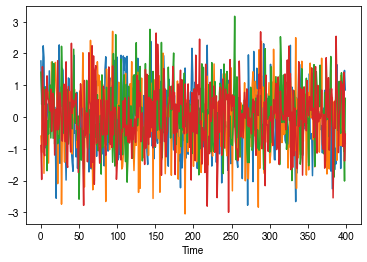

In [24]:
import numpy as np
from matplotlib import pyplot as plt

nTimepoints = 400
nTrials = 2000
np.random.seed(0)
randomData = np.random.randn(nTrials, nTimepoints)
plt.plot(randomData[:4,:].T);
plt.xlabel('Time');

And say we have another "reference" signal that shows a peak at some point in time:

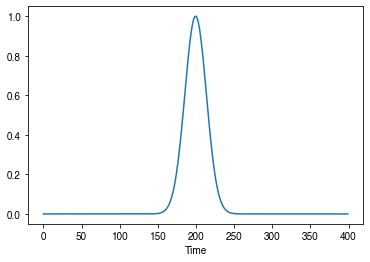

In [27]:
refSignal = np.exp(-np.linspace(-10,10,nTimepoints)**2)
plt.plot(refSignal);
plt.xlabel('Time');

Now, let's sort the random trials according to their correlation to the "reference" signal: 

In [11]:
proj = np.dot(randomData, gauss)
indsSorted = np.argsort(proj)

And let's average the top 1/3 most correlated trials, and the bottom 1/3:

In [19]:
topCorrInds = indsSorted[-nTrials//3:]
bottomCorrInds = indsSorted[0:nTrials//3]
avgTop = randomData[topCorrInds,:].mean(axis=0)
avgBottom = randomData[bottomCorrInds,:].mean(axis=0)

And let's plot the results:

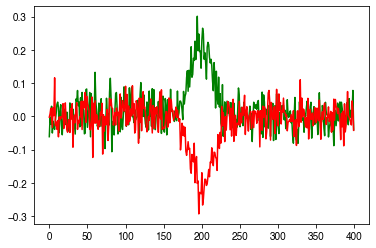

In [22]:
plt.plot(avgTop, 'g')
plt.plot(avgBottom, 'r');

## Conclusion
We started from random data, but the averages show structure (similar to the reference signal) because we groups trials according to the feature we are interested in.